Tarea 1 Inteligencia Artificial GR2 
Instituto Tecnológico de Costa Rica
Bryan Campos Castro
20
Miguel David Sánchez Sánchez
2019061555

Importación de librerías

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Cargar conjunto de datos y visualizarlos

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     bmi   Age  asa_status  baseline_cancer  baseline_charlson  baseline_cvd  \
0  19.31  59.2           1                1                  0             0   
1  18.73  59.1           0                0                  0             0   
2  21.85  59.0           0                0                  0 

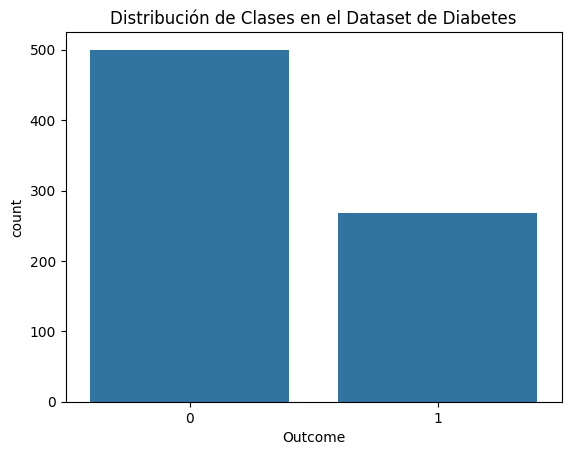

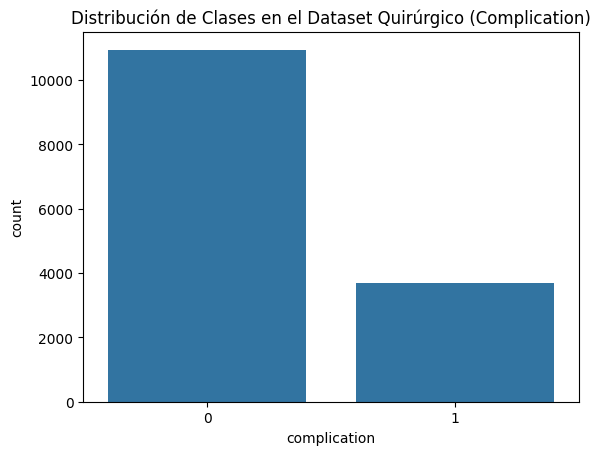

In [10]:
# Cargar los datos de diabetes
diabetes_data = pd.read_csv('diabetes.csv')

# Cargar el segundo conjunto de datos
surgical_data = pd.read_csv('Surgical-deepnet.csv')

# Ver las primeras filas de cada dataset
print(diabetes_data.head())
print(surgical_data.head())

# Resumen estadístico
print(diabetes_data.describe())
print(surgical_data.describe())


# Comprobar si hay valores faltantes
print(diabetes_data.isnull().sum())
print(surgical_data.isnull().sum())


# Revisar las estadísticas descriptivas
print(diabetes_data.describe())
print(surgical_data.describe())

# Visualización de la distribución de clases para el dataset de Diabetes
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Distribución de Clases en el Dataset de Diabetes')
plt.show()

# Visualización de la distribución de la variable de complicaciones
sns.countplot(x='complication', data=surgical_data)
plt.title('Distribución de Clases en el Dataset Quirúrgico (Complication)')
plt.show()

Preparación de los datos

In [11]:
# Separación de los datos y etiquetas para el dataset de Diabetes
X_diabetes = diabetes_data.drop('Outcome', axis=1)
y_diabetes = diabetes_data['Outcome']

# Separación de los datos y etiquetas para el dataset quirúrgico
X_surgical = surgical_data.drop('complication', axis=1)
y_surgical = surgical_data['complication']

# División del dataset de Diabetes en entrenamiento, validación y prueba
X_train_d, X_temp_d, y_train_d, y_temp_d = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)
X_val_d, X_test_d, y_val_d, y_test_d = train_test_split(X_temp_d, y_temp_d, test_size=0.5, random_state=42)

# División del dataset quirúrgico en entrenamiento, validación y prueba
X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(X_surgical, y_surgical, test_size=0.3, random_state=42)
X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(X_temp_s, y_temp_s, test_size=0.5, random_state=42)

# Normalización de los datos
scaler = StandardScaler()

# Normalizar el dataset de Diabetes
X_train_d = scaler.fit_transform(X_train_d)
X_val_d = scaler.transform(X_val_d)
X_test_d = scaler.transform(X_test_d)

# Normalizar el dataset quirúrgico
X_train_s = scaler.fit_transform(X_train_s)
X_val_s = scaler.transform(X_val_s)
X_test_s = scaler.transform(X_test_s)

Entrenamiento

In [12]:
# Entrenamiento de Regresión Logística para el dataset de Diabetes
logreg_diabetes = LogisticRegression()
logreg_diabetes.fit(X_train_d, y_train_d)

# Entrenamiento y evaluación de Regresión Logística y KNN en ambos datasets

# 1. Regresión Logística para Diabetes
logreg_diabetes = LogisticRegression()
logreg_diabetes.fit(X_train_d, y_train_d)
y_pred_val_d_logreg = logreg_diabetes.predict(X_val_d)

# 2. KNN para Diabetes
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train_d, y_train_d)
y_pred_val_d_knn = knn_diabetes.predict(X_val_d)

# 3. Regresión Logística para el dataset quirúrgico
logreg_surgical = LogisticRegression()
logreg_surgical.fit(X_train_s, y_train_s)
y_pred_val_s_logreg = logreg_surgical.predict(X_val_s)

# 4. KNN para el dataset quirúrgico
knn_surgical = KNeighborsClassifier(n_neighbors=5)
knn_surgical.fit(X_train_s, y_train_s)
y_pred_val_s_knn = knn_surgical.predict(X_val_s)

Evaluación

In [13]:
# Evaluación de Regresión Logística para Diabetes
print('Resultados de Regresión Logística para Diabetes:')
print('Accuracy:', accuracy_score(y_val_d, y_pred_val_d_logreg))
print('Precision:', precision_score(y_val_d, y_pred_val_d_logreg))
print('Recall:', recall_score(y_val_d, y_pred_val_d_logreg))
print('Confusion Matrix:\n', confusion_matrix(y_val_d, y_pred_val_d_logreg))

# Evaluación de KNN para Diabetes
print('Resultados de KNN para Diabetes:')
print('Accuracy:', accuracy_score(y_val_d, y_pred_val_d_knn))
print('Precision:', precision_score(y_val_d, y_pred_val_d_knn))
print('Recall:', recall_score(y_val_d, y_pred_val_d_knn))
print('Confusion Matrix:\n', confusion_matrix(y_val_d, y_pred_val_d_knn))

print('Resultados de Regresión Logística para Quirúrgico:')
print('Accuracy:', accuracy_score(y_val_s, y_pred_val_s_logreg))
print('Precision:', precision_score(y_val_s, y_pred_val_s_logreg))
print('Recall:', recall_score(y_val_s, y_pred_val_s_logreg))
print('Confusion Matrix:\n', confusion_matrix(y_val_s, y_pred_val_s_logreg))

# Evaluación de KNN para Quirúrgico
print('Resultados de KNN para Quirúrgico:')
print('Accuracy:', accuracy_score(y_val_s, y_pred_val_s_knn))
print('Precision:', precision_score(y_val_s, y_pred_val_s_knn))
print('Recall:', recall_score(y_val_s, y_pred_val_s_knn))
print('Confusion Matrix:\n', confusion_matrix(y_val_s, y_pred_val_s_knn))

Resultados de Regresión Logística para Diabetes:
Accuracy: 0.7304347826086957
Precision: 0.575
Recall: 0.6216216216216216
Confusion Matrix:
 [[61 17]
 [14 23]]
Resultados de KNN para Diabetes:
Accuracy: 0.6956521739130435
Precision: 0.5263157894736842
Recall: 0.5405405405405406
Confusion Matrix:
 [[60 18]
 [17 20]]
Resultados de Regresión Logística para Quirúrgico:
Accuracy: 0.7913439635535308
Precision: 0.6426229508196721
Recall: 0.3596330275229358
Confusion Matrix:
 [[1541  109]
 [ 349  196]]
Resultados de KNN para Quirúrgico:
Accuracy: 0.7612756264236902
Precision: 0.5283018867924528
Recall: 0.3596330275229358
Confusion Matrix:
 [[1475  175]
 [ 349  196]]
